# Airbnb Dataset: Exploratory Data Analysis (EDA)

This notebook presents an EDA of Airbnb property data to uncover patterns related to pricing, property characteristics, location, and review scores. The analysis supports actionable insights for pricing strategies and market positioning.

## Business Questions Addressed:

1. What property features (e.g., room type, beds, location) are most strongly associated with price differences?
2. How do neighborhood and property type combinations influence price?
3. What is the relationship between review scores, price, and property characteristics?
4. What factors distinguish high-review properties, and are there any patterns in review distributions?


## 1. Setup and Data Loading

### 1.1 Import Libraries

In [1]:
# 1.1 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visualization style for consistency
plt.style.use('seaborn-v0_8-whitegrid')  # Modern, clean style
sns.set_palette("deep")  # Color palette suitable for business presentations

# Configure visualization settings
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

print("Libraries imported successfully and visualization style set.")

Libraries imported successfully and visualization style set.


### 1.2 Load Cleaned Airbnb Dataset

Load the cleaned Airbnb dataset from the CSV file for analysis.

In [2]:
# 1.2 Load the cleaned Airbnb dataset
try:
    file_path = os.path.join("..", "Datasource", "airbnb_clean.csv")
    df = pd.read_csv(file_path)
    print('Airbnb cleaned dataset loaded successfully.')
    # Display the shape of the dataset
    print(f"\nDataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns")
except Exception as e:
    print(f'Error loading dataset: {e}')
    print('Please ensure the file exists in the Datasource folder and is accessible.')
    df = None

Airbnb cleaned dataset loaded successfully.

Dataset dimensions: 17282 rows and 11 columns


## 2. Data Quality Assessment

Assess the dataset’s structure, completeness, and potential quality issues.

### 2.1 Preview the Dataset

Display the first few rows to review the dataset’s structure and contents.

In [3]:
# Import StringIO for info capture
from io import StringIO

if df is not None:
    print("=== DATA PREVIEW ===")
    display(df.head())  # Using display for better notebook rendering
    
    print("\n=== DATA INFORMATION ===")
    # Capture info in a buffer
    buffer = StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()
    print(info_str)
    
    print("\n=== SUMMARY STATISTICS ===")
    display(df.describe())
else:
    print('No data loaded to preview.')

=== DATA PREVIEW ===


,Host Id,Host Since,Neighbourhood,Zipcode,Property Type,Room Type,Beds,Price,Number of Records,Number Of Reviews,Review Scores Rating
0,1039,2008-07-25,Brooklyn,11222.0,Apartment,Entire home/apt,1.0,149,1,4,100.0
1,1783,2008-08-12,Manhattan,10004.0,Apartment,Entire home/apt,1.0,250,1,9,100.0
2,2078,2008-08-15,Brooklyn,11201.0,Apartment,Private room,1.0,90,1,80,94.0
3,2339,2008-08-20,Manhattan,10009.0,Apartment,Entire home/apt,2.0,270,1,95,90.0
4,2571,2008-08-27,Brooklyn,11221.0,Apartment,Entire home/apt,2.0,170,1,14,98.0



=== DATA INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17282 entries, 0 to 17281
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Host Id               17282 non-null  int64  
 1   Host Since            17282 non-null  object 
 2   Neighbourhood         17282 non-null  object 
 3   Zipcode               17282 non-null  float64
 4   Property Type         17282 non-null  object 
 5   Room Type             17282 non-null  object 
 6   Beds                  17282 non-null  float64
 7   Price                 17282 non-null  int64  
 8   Number of Records     17282 non-null  int64  
 9   Number Of Reviews     17282 non-null  int64  
 10  Review Scores Rating  17282 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.5+ MB


=== SUMMARY STATISTICS ===


,Host Id,Zipcode,Beds,Price,Number of Records,Number Of Reviews,Review Scores Rating
count,1.728200e+04,17282.000000,17282.000000,17282.000000,17282.0,17282.000000,17282.000000
mean,1.124935e+07,10557.429522,1.495197,157.209351,1.0,15.105138,92.621977
std,1.085891e+07,595.966293,0.943705,147.034940,0.0,22.614560,8.504217
min,1.039000e+03,7105.000000,0.000000,20.000000,1.0,1.000000,20.000000
25%,2.364498e+06,10016.000000,1.000000,90.000000,1.0,2.000000,90.000000
50%,7.117858e+06,10038.000000,1.000000,132.000000,1.0,6.000000,95.000000
75%,1.828520e+07,11215.000000,2.000000,190.000000,1.0,18.000000,100.000000
max,4.272660e+07,11694.000000,16.000000,10000.000000,1.0,257.000000,100.000000


### 2.2 Check for Missing Values and Data Types

Assess missing values, data type consistency, and duplicates.

In [4]:
if df is not None:
    print('=== DATA QUALITY CHECK ===')
    
    # Check for missing values
    missing_values = df.isnull().sum()
    
    # Calculate percentage of missing values
    print('\nMissing values percentage:')
    missing_percentage = round(100 * missing_values / len(df), 2)
    
    # Create a DataFrame for better visualization
    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    })
    display(missing_data)
    
    print('\nData types:')
    display(pd.DataFrame(df.dtypes, columns=['Data Type']))
    
    # Check for duplicates
    duplicate_count = df.duplicated().sum()
    print(f'\nNumber of duplicate rows: {duplicate_count} ({round(100 * duplicate_count / len(df), 2)}% of data)')
else:
    print('No data loaded to check for missing values or data types.')

=== DATA QUALITY CHECK ===

Missing values percentage:


,Missing Values,Percentage
Host Id,0,0.0
Host Since,0,0.0
Neighbourhood,0,0.0
Zipcode,0,0.0
Property Type,0,0.0
Room Type,0,0.0
Beds,0,0.0
Price,0,0.0
Number of Records,0,0.0
Number Of Reviews,0,0.0



Data types:


,Data Type
Host Id,int64
Host Since,object
Neighbourhood,object
Zipcode,float64
Property Type,object
Room Type,object
Beds,float64
Price,int64
Number of Records,int64
Number Of Reviews,int64



Number of duplicate rows: 0 (0.0% of data)


## 3: BUSINESS QUESTIONS & ANALYSIS GOALS

The exploratory data analysis focuses on uncovering patterns in pricing, location, property characteristics, and review scores to support data-driven decisions.

### Key Business Questions:

1. **Pricing Factors**  
   What property features (e.g., location, property type, room type, beds) are most strongly associated with price differences?

2. **Neighborhood Analysis**  
   How do price levels and review scores vary across neighborhoods? Which areas offer the best value for different types of properties?

3. **Rating Analysis**  
   What is the relationship between review scores, price, and property characteristics?

4. **Review Patterns**  
   Are there notable patterns in review counts by property type or location?

## 4: UNIVARIATE ANALYSIS

Univariate analysis examines individual variables to understand their distribution, central tendency, variability, and potential outliers. This provides insight into pricing patterns, property characteristics, and market structure.


### 4.1 Numerical Variables Distribution

Analyze the distribution of key numerical variables: `Price`, `Review Scores Rating`, `Number Of Reviews`, `Number of Records`, and `Beds`. The goal is to identify pricing patterns, rating trends, and booking frequency to support market segmentation and pricing strategy.

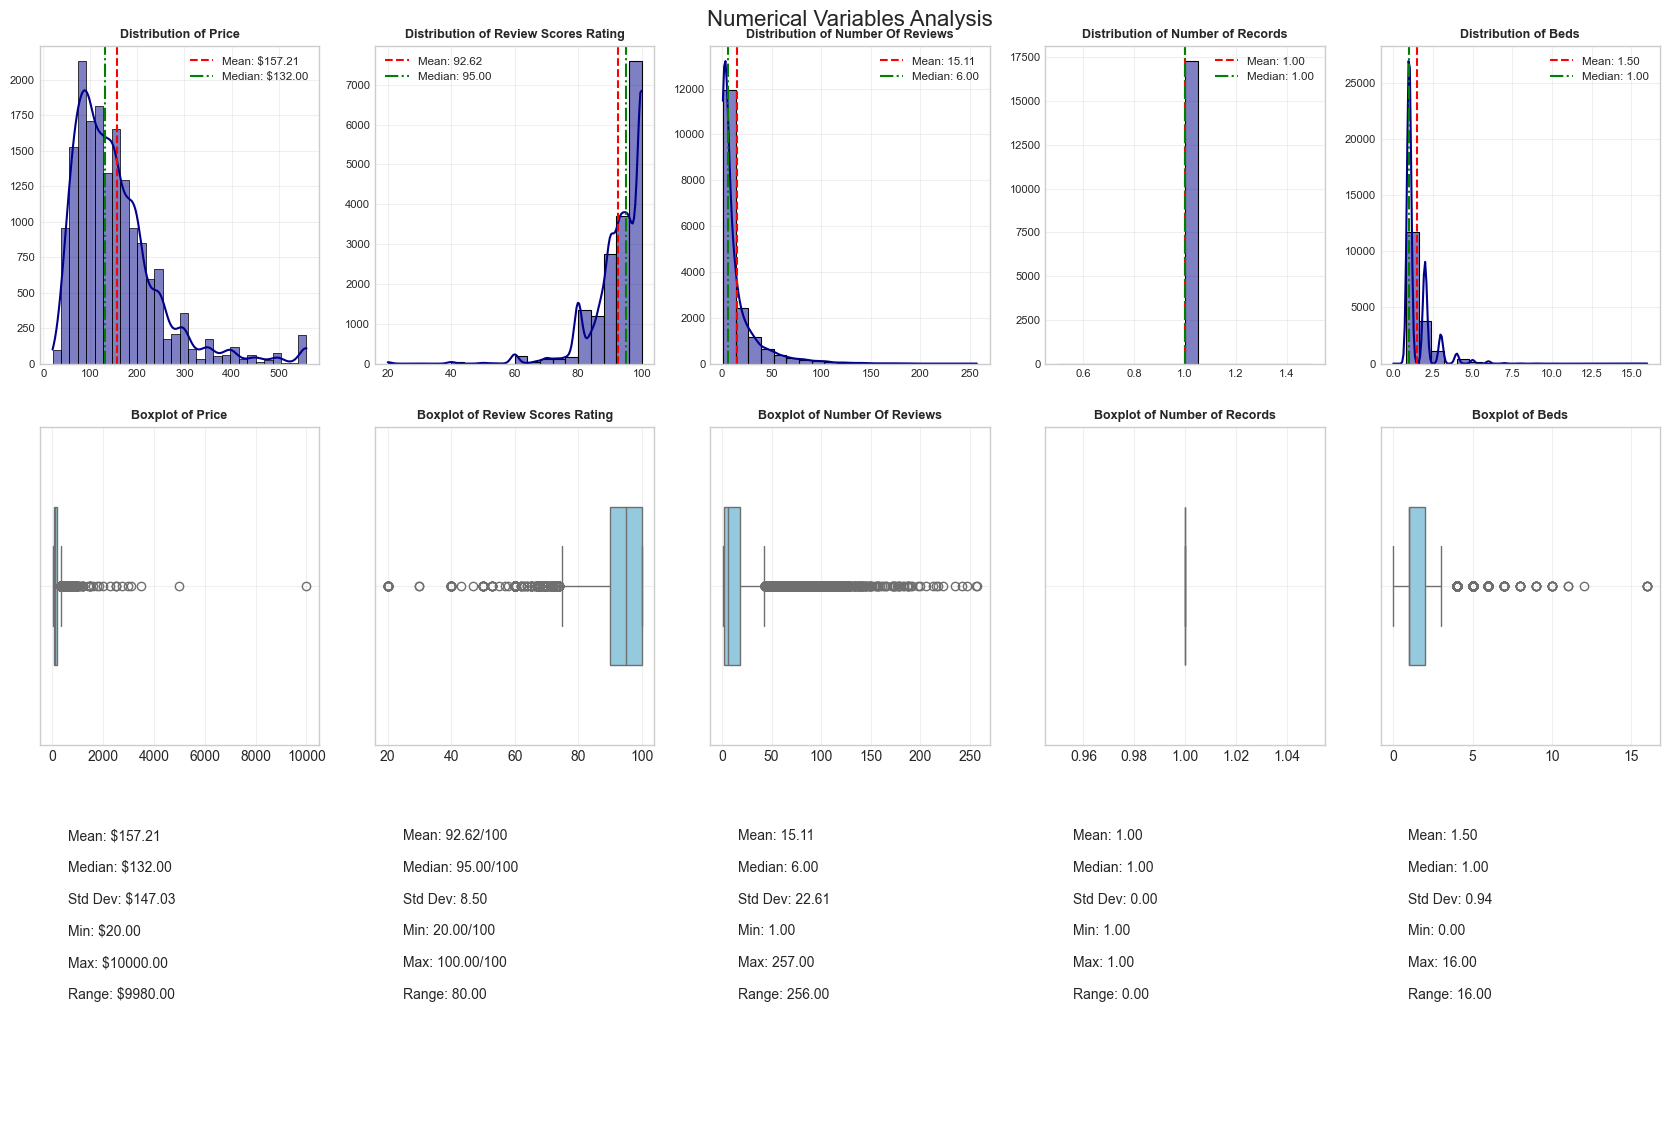

In [5]:
if df is not None:
    # Set up figure size for numerical variables analysis
    plt.figure(figsize=(18, 12))
    
    # Define numerical columns to analyze
    numerical_cols = ['Price', 'Review Scores Rating', 'Number Of Reviews', 'Number of Records', 'Beds']
    
    # Loop through numerical columns and create histograms and boxplots
    for i, col in enumerate(numerical_cols):
        # Create histograms with better bin settings and KDE
        plt.subplot(3, len(numerical_cols), i+1)
        if col == 'Price':
            # Use more bins for price to show distribution details
            # Clip at 99th percentile to handle extreme outliers for visualization
            sns.histplot(df[col].clip(upper=df[col].quantile(0.99)), kde=True, bins=30, color='darkblue')
            plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: ${df[col].mean():.2f}')
            plt.axvline(df[col].median(), color='green', linestyle='-.', label=f'Median: ${df[col].median():.2f}')
        else:
            # Standard visualization for non-price numerical variables
            sns.histplot(df[col], kde=True, bins=20, color='darkblue')
            plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
            plt.axvline(df[col].median(), color='green', linestyle='-.', label=f'Median: {df[col].median():.2f}')
 
        plt.title(f'Distribution of {col}', fontdict={'fontsize': 9, 'weight': 'bold'})
        plt.xlabel('')
        plt.ylabel('')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize='small')
        plt.tick_params(labelsize=8)
        
        # Create boxplots with enhanced styling
        plt.subplot(3, len(numerical_cols), i+len(numerical_cols)+1)
        sns.boxplot(x=df[col], color='skyblue', width=0.5)
        plt.title(f'Boxplot of {col}', fontdict={'fontsize': 9, 'weight': 'bold'})
        plt.xlabel('')
        plt.ylabel('')
        plt.grid(True, alpha=0.3)

        # Add descriptive statistics with improved formatting
        plt.subplot(3, len(numerical_cols), i+(2*len(numerical_cols))+1)
        plt.axis('off')
        
        # Format statistics
        stats = df[col].describe()
        
        # Add dollar sign for price, otherwise keep format consistent
        prefix = "$" if col == "Price" else ""
        suffix = "/100" if col == "Review Scores Rating" else ""
        
        plt.text(0.1, 0.9, f"Mean: {prefix}{stats['mean']:.2f}{suffix}")
        plt.text(0.1, 0.8, f"Median: {prefix}{stats['50%']:.2f}{suffix}")
        plt.text(0.1, 0.7, f"Std Dev: {prefix}{stats['std']:.2f}")
        plt.text(0.1, 0.6, f"Min: {prefix}{stats['min']:.2f}{suffix}")
        plt.text(0.1, 0.5, f"Max: {prefix}{stats['max']:.2f}{suffix}")
        plt.text(0.1, 0.4, f"Range: {prefix}{stats['max'] - stats['min']:.2f}")
    
    # Adjust spacing to reduce excessive margins and optimize layout
    plt.subplots_adjust(hspace=0.2,  # Vertical space between rows
                        left=0.05,   # Reduce left margin
                        right=0.95,  # Increase usable right area
                        top=0.95,    # Increase usable top area
                        bottom=0.05) # Reduce bottom margin
    
    plt.suptitle("Numerical Variables Analysis", fontsize=16, y=0.98)
    plt.show()
else:
    print('No data loaded to analyze numerical variable distributions.')

In [6]:
if df is not None:
    # Calculate business insights from numerical variables
    
    # Price insights
    avg_price = df['Price'].mean()
    median_price = df['Price'].median()
    price_range = df['Price'].max() - df['Price'].min()
    
    # Reviews insights
    avg_reviews = df['Number Of Reviews'].mean()
    median_reviews = df['Number Of Reviews'].median()
    
    # Ratings insights
    avg_rating = df['Review Scores Rating'].mean()
    
    # Beds insights
    avg_beds = df['Beds'].mean()
    most_common_beds = df['Beds'].mode()[0]
    
    # Create a markdown-formatted string for business insights
    business_insights = """
    \n## NUMERICAL VARIABLES BUSINESS INSIGHTS
    
    \n### Price Insights
    • Average listing price: ${:.2f}
    • Median listing price: ${:.2f}
    • Price range: ${:.2f}
    • **Business Impact**: The significant difference between mean and median prices (${:.2f}) suggests price skewing due to luxury listings.
    
    \n### Reviews Insights
    • Average number of reviews per listing: {:.2f}
    • Median number of reviews per listing: {:.2f}
    • **Business Impact**: Properties with more than {:.0f} reviews exceed the market median for guest engagement, as measured by review count.

    \n### Ratings Insights
    • Average rating: {:.2f}/100
    • **Business Impact**: Ratings show little variation, with most listings rated highly. Other factors like price, location, and amenities are likely more influential for guests.
    
    \n### Beds Insights
    • Average number of beds: {:.2f}
    • Most common bed configuration: {}
    • **Business Impact**: Properties with {} beds represent the most common inventory type, suggesting market saturation in this segment.
    """.format(
        avg_price, median_price, price_range, avg_price - median_price,
        avg_reviews, median_reviews, median_reviews,
        avg_rating,
        avg_beds, most_common_beds, most_common_beds
    )
    
    # Display the business insights using IPython.display for better formatting
    from IPython.display import Markdown
    display(Markdown(business_insights))
else:
    print('No data loaded to analyze numerical variable distributions.')


    
## NUMERICAL VARIABLES BUSINESS INSIGHTS

    
### Price Insights
    • Average listing price: $157.21
    • Median listing price: $132.00
    • Price range: $9980.00
    • **Business Impact**: The significant difference between mean and median prices ($25.21) suggests price skewing due to luxury listings.

    
### Reviews Insights
    • Average number of reviews per listing: 15.11
    • Median number of reviews per listing: 6.00
    • **Business Impact**: Properties with more than 6 reviews exceed the market median for guest engagement, as measured by review count.

    
### Ratings Insights
    • Average rating: 92.62/100
    • **Business Impact**: Ratings show little variation, with most listings rated highly. Other factors like price, location, and amenities are likely more influential for guests.

    
### Beds Insights
    • Average number of beds: 1.50
    • Most common bed configuration: 1.0
    • **Business Impact**: Properties with 1.0 beds represent the most common inventory type, suggesting market saturation in this segment.
    

### 4.2 Categorical Variables Distribution

Analyze the distribution of key categorical variables: `Neighbourhood`, `Zipcode`, `Property Type`, and `Room Type`. This helps identify popular areas, property segments, and opportunities for competitive positioning.

In [7]:
if df is not None:
    # Define helper functions for categorical analysis
    
    # Function to plot top N categories for a categorical variable
    def plot_top_categories(data, column, axis, top_n=10, title=None, color=None):
        """Create a bar chart of the top N categories for a given column"""
        counts = data[column].value_counts().nlargest(top_n)
        bars = counts.plot(kind='bar', ax=axis, color=color)
        axis.set_title(title if title else f'Top {top_n} {column}s', fontdict={'fontsize': 9, 'weight': 'bold'})
        axis.grid(True, axis='y', alpha=0.3, linestyle='--')
        
        # Add percentage labels to bars
        total = len(data)
        for i, v in enumerate(counts):
            percentage = (v / total) * 100
            axis.text(i, v + 0.1, f"{v}\n({percentage:.1f}%)", ha='center', fontsize=8)
        
        # Improve x-axis labels and y-axis labels
        plt.setp(axis.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=8)
        plt.setp(axis.yaxis.get_majorticklabels(), fontsize=8)
        
        return counts
    
    # Function to calculate and return formatted category percentages with business insights
    def get_category_insights(data, column, top_n=10):
        """Generate business insights for categorical variables"""
        total = len(data)
        counts = data[column].value_counts().nlargest(top_n)
        percentages = (counts / total * 100).round(1)
        
        # Calculate average price by category
        category_prices = data.groupby(column)['Price'].agg(['mean', 'median', 'count'])
        category_prices = category_prices.loc[counts.index]
        
        insights = f"### {column.upper()} DISTRIBUTION\n\n"
        
        for cat, count in counts.items():
            pct = percentages[cat]
            avg_price = category_prices.loc[cat, 'mean']
            median_price = category_prices.loc[cat, 'median']
            insights += f"• **{cat}**: {count} listings ({pct}% of market) | Avg Price: ${avg_price:.0f} | Median: ${median_price:.0f}\n\n"
        
        # Calculate concentration
        top_concentration = percentages.sum()
        insights += f"• **Market concentration**: Top {top_n} {column.lower()}s represent {top_concentration:.1f}% of all listings\n\n"
        
        # Price comparison
        overall_avg = data['Price'].mean()
        highest_price_cat = category_prices['mean'].idxmax()
        highest_price = category_prices.loc[highest_price_cat, 'mean']
        insights += f"• **Pricing insights**: {highest_price_cat} has the highest average price (${highest_price:.0f} vs. overall ${overall_avg:.0f})\n\n"
        
        return insights
    
    print("Helper functions for categorical analysis defined.")
else:
    print('No data loaded for categorical variable analysis.')

Helper functions for categorical analysis defined.


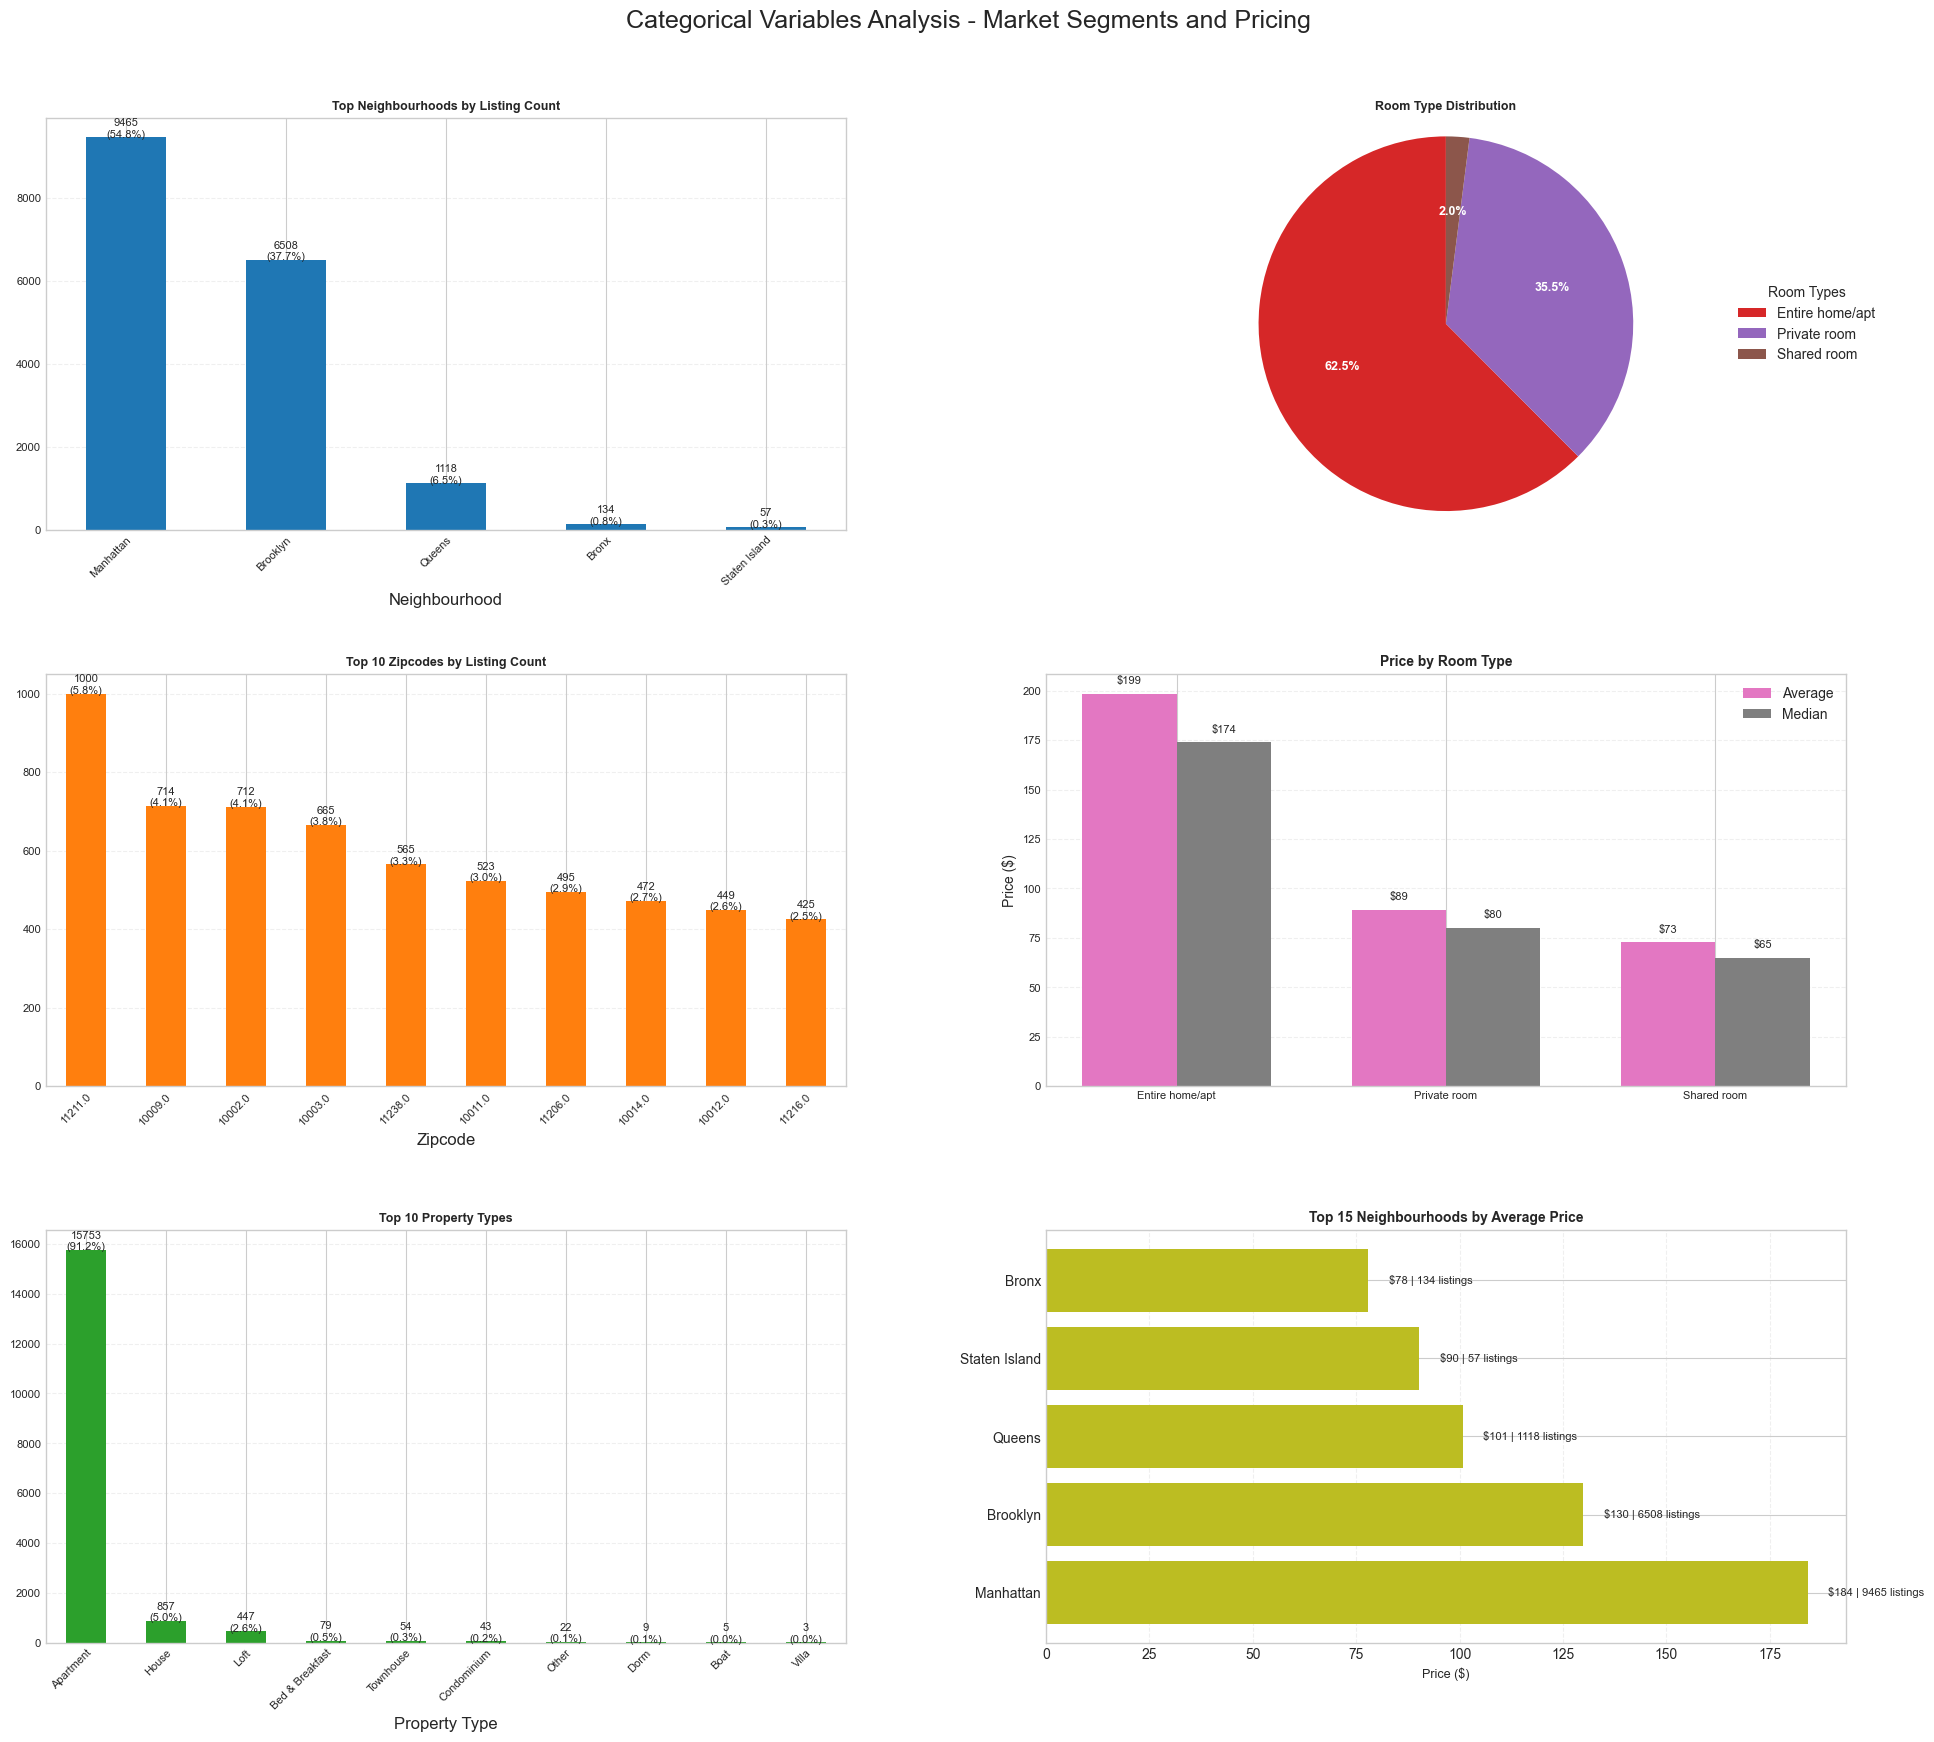

In [8]:
if df is not None:
    # Set up figure size for categorical variables analysis
    plt.figure(figsize=(20, 18))
    
    # Define categorical columns to analyze
    categorical_cols = ['Neighbourhood', 'Zipcode', 'Property Type', 'Room Type']
    
    # Color palette for consistent visuals
    colors = plt.cm.tab10.colors
    
    # Plot Neighbourhood distribution (first column, first row)
    ax1 = plt.subplot(3, 2, 1)
    top_neighborhoods = plot_top_categories(df, 'Neighbourhood', ax1, top_n=10, 
                                           title='Top Neighbourhoods by Listing Count', color=colors[0])
    
    # Plot Zipcode distribution (first column, second row)
    ax3 = plt.subplot(3, 2, 3)
    top_zipcodes = plot_top_categories(df, 'Zipcode', ax3, top_n=10,
                                      title='Top 10 Zipcodes by Listing Count', color=colors[1])
    
    # Plot Property Type distribution (first column, third row)
    ax5 = plt.subplot(3, 2, 5)
    top_property_types = plot_top_categories(df, 'Property Type', ax5, top_n=10, 
                                            title='Top 10 Property Types', color=colors[2])
    
    # Plot Room Type distribution with pie chart (second column, first row)
    ax2 = plt.subplot(3, 2, 2)
    room_type_counts = df['Room Type'].value_counts()
    
    # Create pie chart for Room Type with percentages inside
    wedges, _, autotexts = ax2.pie(
        room_type_counts, 
        labels=None,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90,
        colors=colors[3:6],
    )

    # Create a legend with room type information
    ax2.legend(wedges, room_type_counts.index, title="Room Types", loc="center left", bbox_to_anchor=(0.85, 0.5))
    
    # Style the percentage text inside slices
    plt.setp(autotexts, size=9, weight="bold", color="white")
        
    ax2.set_title('Room Type Distribution', fontdict={'fontsize': 9, 'weight': 'bold'})
    ax2.axis('equal')  
    
    # Add price comparison by Room Type (second column, second row)
    ax4 = plt.subplot(3, 2, 4)
    room_price_data = df.groupby('Room Type')['Price'].agg(['mean', 'median']).reset_index()
    
    # Create a grouped bar chart for price comparison
    x = range(len(room_price_data))
    width = 0.35
    ax4.bar([i - width/2 for i in x], room_price_data['mean'], width, label='Average', color=colors[6])
    ax4.bar([i + width/2 for i in x], room_price_data['median'], width, label='Median', color=colors[7])
    
    # Add data labels to bars
    for i in x:
        ax4.text(i - width/2, room_price_data['mean'][i] + 5, f"${room_price_data['mean'][i]:.0f}", ha='center', fontsize=8)
        ax4.text(i + width/2, room_price_data['median'][i] + 5, f"${room_price_data['median'][i]:.0f}", ha='center', fontsize=8)
    
    ax4.set_title('Price by Room Type', fontdict={'fontsize': 10, 'weight': 'bold'})
    ax4.set_ylabel('Price ($)', fontdict={'fontsize': 10})
    ax4.set_xticks(x)
    ax4.set_xticklabels(room_price_data['Room Type'])
    ax4.grid(True, axis='y', alpha=0.3, linestyle='--')
    ax4.legend()
    
    # Set font size for X and Y axis tick labels
    plt.setp(ax4.xaxis.get_majorticklabels(), fontsize=8)
    plt.setp(ax4.yaxis.get_majorticklabels(), fontsize=8)
    
    # Add price comparison by Neighbourhood (second column, third row)
    ax6 = plt.subplot(3, 2, 6)
    neighbourhood_price = df.groupby('Neighbourhood')['Price'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=True)
    
    # Create horizontal bar chart for neighborhood prices (top 15)
    top_15_by_price = neighbourhood_price.nlargest(15, 'mean')
    bars = ax6.barh(top_15_by_price.index, top_15_by_price['mean'], color=colors[8])
    ax6.set_title('Top 15 Neighbourhoods by Average Price', fontdict={'fontsize': 10, 'weight': 'bold'})
    ax6.set_xlabel('Price ($)', fontdict={'fontsize': 9})
    ax6.grid(True, axis='x', alpha=0.3, linestyle='--')
    
    # Add count and price labels
    for i, bar in enumerate(bars):
        neighborhood = top_15_by_price.index[i]
        count = top_15_by_price.loc[neighborhood, 'count']
        price = top_15_by_price.loc[neighborhood, 'mean']
        ax6.text(price + 5, i, f"${price:.0f} | {count} listings", va='center', fontsize=8)
    
    # Layout adjustments
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.35, wspace=0.25, top=0.92)
    plt.suptitle("Categorical Variables Analysis - Market Segments and Pricing", fontsize=18, y=0.98)
    plt.show()
else:
    print('No data loaded to analyze categorical variable distributions.')

In [9]:
if df is not None:
    # Generate and display business insights for categorical variables
    all_insights = "## CATEGORICAL VARIABLES BUSINESS INSIGHTS\n\n"
    
    # Generate insights for each categorical column
    for col in categorical_cols:
        top_n = 5 if col in ['Neighbourhood', 'Zipcode'] else 8 if col == 'Property Type' else len(df[col].unique())
        all_insights += get_category_insights(df, col, top_n=top_n)
    
    # Display the insights
    display(Markdown(all_insights))
    
    # Calculate and display additional market insights with business focus
    print("\n=== MARKET STRUCTURE & PRICING INSIGHTS ===")
    
    # Calculate market concentration metrics
    total_listings = len(df)
    
    # Neighborhood concentration and pricing premium
    neighborhood_data = df.groupby('Neighbourhood').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median', 'std']
    })
    
    # Flatten the multi-level column index
    neighborhood_data.columns = ['Listings', 'Avg_Price', 'Median_Price', 'Price_Std']
    neighborhood_data['Market_Share'] = (neighborhood_data['Listings'] / total_listings * 100).round(1)
    neighborhood_data['Price_Premium'] = ((neighborhood_data['Avg_Price'] / df['Price'].mean() - 1) * 100).round(1)
    
    # Most expensive neighborhood
    most_expensive = neighborhood_data.sort_values('Avg_Price', ascending=False).index[0]
    premium_pct = neighborhood_data.loc[most_expensive, 'Price_Premium']
    print(f"• Premium neighborhood: {most_expensive} commands {premium_pct:+.1f}% price premium vs. market average")
    
    # Most popular neighborhood
    most_popular = neighborhood_data.sort_values('Listings', ascending=False).index[0]
    market_share = neighborhood_data.loc[most_popular, 'Market_Share']
    print(f"• Market leader: {most_popular} holds {market_share:.1f}% market share with {int(neighborhood_data.loc[most_popular, 'Listings'])} listings")
    
    # Property type insights
    property_data = df.groupby('Property Type').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median']
    }).iloc[:, :3]
    property_data.columns = ['Listings', 'Avg_Price', 'Median_Price']
    property_data['Market_Share'] = (property_data['Listings'] / total_listings * 100).round(1)
    
    # Most profitable property type
    most_profitable = property_data.sort_values('Avg_Price', ascending=False).index[0]
    profit_premium = ((property_data.loc[most_profitable, 'Avg_Price'] / df['Price'].mean() - 1) * 100).round(1)
    print(f"• Highest revenue opportunity: {most_profitable} listings average ${property_data.loc[most_profitable, 'Avg_Price']:.0f}/night ({profit_premium:+.1f}% vs. market)")
    
    # Room type insights with price premium calculation
    room_data = df.groupby('Room Type').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median']
    }).iloc[:, :3]
    room_data.columns = ['Listings', 'Avg_Price', 'Median_Price']
    room_data['Market_Share'] = (room_data['Listings'] / total_listings * 100).round(1)
    
    # Entire home premium calculation
    if 'Entire home/apt' in room_data.index and 'Private room' in room_data.index:
        entire_home_premium = ((room_data.loc['Entire home/apt', 'Avg_Price'] /
                                room_data.loc['Private room', 'Avg_Price'] - 1) * 100).round(1)
        print(f"• Entire home premium: {entire_home_premium:+.1f}% price premium over private rooms")
    
    # Price-to-bed ratio analysis
    df['Price_per_Bed'] = df['Price'] / df['Beds']
    best_value_type = df.groupby('Property Type')['Price_per_Bed'].median().nsmallest(1).index[0]
    print(f"• Best value proposition: {best_value_type} offers lowest price-to-bed ratio")
    
    # Most common property configuration
    most_common_config = df.groupby(['Property Type', 'Room Type']).size().nlargest(1)
    config_index = most_common_config.index[0]
    config_share = (most_common_config.iloc[0] / total_listings * 100).round(1)
    print(f"• Most common offering: {config_index[0]} with {config_index[1]} ({config_share:.1f}% of market)")
else:
    print('No data loaded to analyze categorical variable distributions.')

## CATEGORICAL VARIABLES BUSINESS INSIGHTS

### NEIGHBOURHOOD DISTRIBUTION

• **Manhattan**: 9465 listings (54.8% of market) | Avg Price: $184 | Median: $155

• **Brooklyn**: 6508 listings (37.7% of market) | Avg Price: $130 | Median: $110

• **Queens**: 1118 listings (6.5% of market) | Avg Price: $101 | Median: $85

• **Bronx**: 134 listings (0.8% of market) | Avg Price: $78 | Median: $68

• **Staten Island**: 57 listings (0.3% of market) | Avg Price: $90 | Median: $75

• **Market concentration**: Top 5 neighbourhoods represent 100.1% of all listings

• **Pricing insights**: Manhattan has the highest average price ($184 vs. overall $157)

### ZIPCODE DISTRIBUTION

• **11211.0**: 1000 listings (5.8% of market) | Avg Price: $150 | Median: $139

• **10009.0**: 714 listings (4.1% of market) | Avg Price: $177 | Median: $150

• **10002.0**: 712 listings (4.1% of market) | Avg Price: $174 | Median: $150

• **10003.0**: 665 listings (3.8% of market) | Avg Price: $201 | Median: $179

• **11238.0**: 565 listings (3.3% of market) | Avg Price: $134 | Median: $120

• **Market concentration**: Top 5 zipcodes represent 21.1% of all listings

• **Pricing insights**: 10003.0 has the highest average price ($201 vs. overall $157)

### PROPERTY TYPE DISTRIBUTION

• **Apartment**: 15753 listings (91.2% of market) | Avg Price: $155 | Median: $135

• **House**: 857 listings (5.0% of market) | Avg Price: $159 | Median: $100

• **Loft**: 447 listings (2.6% of market) | Avg Price: $214 | Median: $150

• **Bed & Breakfast**: 79 listings (0.5% of market) | Avg Price: $108 | Median: $95

• **Townhouse**: 54 listings (0.3% of market) | Avg Price: $256 | Median: $147

• **Condominium**: 43 listings (0.2% of market) | Avg Price: $242 | Median: $165

• **Other**: 22 listings (0.1% of market) | Avg Price: $187 | Median: $102

• **Dorm**: 9 listings (0.1% of market) | Avg Price: $64 | Median: $65

• **Market concentration**: Top 8 property types represent 100.0% of all listings

• **Pricing insights**: Townhouse has the highest average price ($256 vs. overall $157)

### ROOM TYPE DISTRIBUTION

• **Entire home/apt**: 10797 listings (62.5% of market) | Avg Price: $199 | Median: $174

• **Private room**: 6137 listings (35.5% of market) | Avg Price: $89 | Median: $80

• **Shared room**: 348 listings (2.0% of market) | Avg Price: $73 | Median: $65

• **Market concentration**: Top 3 room types represent 100.0% of all listings

• **Pricing insights**: Entire home/apt has the highest average price ($199 vs. overall $157)




=== MARKET STRUCTURE & PRICING INSIGHTS ===
• Premium neighborhood: Manhattan commands +17.2% price premium vs. market average
• Market leader: Manhattan holds 54.8% market share with 9465 listings
• Highest revenue opportunity: Townhouse listings average $256/night (+62.8% vs. market)
• Entire home premium: +122.2% price premium over private rooms
• Best value proposition: Camper/RV offers lowest price-to-bed ratio
• Most common offering: Apartment with Entire home/apt (57.9% of market)


In [10]:
if df is not None:
    # Generate and display business insights for categorical variables
    all_insights = "## CATEGORICAL VARIABLES BUSINESS INSIGHTS\n\n"
    
    # Generate insights for each categorical column
    for col in categorical_cols:
        top_n = 5 if col in ['Neighbourhood', 'Zipcode'] else 8 if col == 'Property Type' else len(df[col].unique())
        all_insights += get_category_insights(df, col, top_n=top_n)
    
    # Display the insights
    display(Markdown(all_insights))
    
    # Calculate and display additional market insights with business focus
    print("\n=== MARKET STRUCTURE & PRICING INSIGHTS ===")
    
    # Calculate market concentration metrics
    total_listings = len(df)
    
    # Neighborhood concentration and pricing premium
    neighborhood_data = df.groupby('Neighbourhood').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median', 'std']
    })
    
    # Flatten the multi-level column index
    neighborhood_data.columns = ['Listings', 'Avg_Price', 'Median_Price', 'Price_Std']
    neighborhood_data['Market_Share'] = (neighborhood_data['Listings'] / total_listings * 100).round(1)
    neighborhood_data['Price_Premium'] = ((neighborhood_data['Avg_Price'] / df['Price'].mean() - 1) * 100).round(1)
    
    # Most expensive neighborhood
    most_expensive = neighborhood_data.sort_values('Avg_Price', ascending=False).index[0]
    premium_pct = neighborhood_data.loc[most_expensive, 'Price_Premium']
    print(f"• Premium neighborhood: {most_expensive} commands {premium_pct:+.1f}% price premium vs. market average")
    
    # Most popular neighborhood
    most_popular = neighborhood_data.sort_values('Listings', ascending=False).index[0]
    market_share = neighborhood_data.loc[most_popular, 'Market_Share']
    print(f"• Market leader: {most_popular} holds {market_share:.1f}% market share with {int(neighborhood_data.loc[most_popular, 'Listings'])} listings")
    
    # Property type insights
    property_data = df.groupby('Property Type').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median']
    }).iloc[:, :3]
    property_data.columns = ['Listings', 'Avg_Price', 'Median_Price']
    property_data['Market_Share'] = (property_data['Listings'] / total_listings * 100).round(1)
    
    # Most profitable property type
    most_profitable = property_data.sort_values('Avg_Price', ascending=False).index[0]
    profit_premium = ((property_data.loc[most_profitable, 'Avg_Price'] / df['Price'].mean() - 1) * 100).round(1)
    print(f"• Highest revenue opportunity: {most_profitable} listings average ${property_data.loc[most_profitable, 'Avg_Price']:.0f}/night ({profit_premium:+.1f}% vs. market)")
    
    # Room type insights with price premium calculation
    room_data = df.groupby('Room Type').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median']
    }).iloc[:, :3]
    room_data.columns = ['Listings', 'Avg_Price', 'Median_Price']
    room_data['Market_Share'] = (room_data['Listings'] / total_listings * 100).round(1)
    
    # Entire home premium calculation
    if 'Entire home/apt' in room_data.index and 'Private room' in room_data.index:
        entire_home_premium = ((room_data.loc['Entire home/apt', 'Avg_Price'] /
                                room_data.loc['Private room', 'Avg_Price'] - 1) * 100).round(1)
        print(f"• Entire home premium: {entire_home_premium:+.1f}% price premium over private rooms")
    
    # Price-to-bed ratio analysis
    df['Price_per_Bed'] = df['Price'] / df['Beds']
    best_value_type = df.groupby('Property Type')['Price_per_Bed'].median().nsmallest(1).index[0]
    print(f"• Best value proposition: {best_value_type} offers lowest price-to-bed ratio")
    
    # Most common property configuration
    most_common_config = df.groupby(['Property Type', 'Room Type']).size().nlargest(1)
    config_index = most_common_config.index[0]
    config_share = (most_common_config.iloc[0] / total_listings * 100).round(1)
    print(f"• Most common offering: {config_index[0]} with {config_index[1]} ({config_share:.1f}% of market)")
else:
    print('No data loaded to analyze categorical variable distributions.')

## CATEGORICAL VARIABLES BUSINESS INSIGHTS

### NEIGHBOURHOOD DISTRIBUTION

• **Manhattan**: 9465 listings (54.8% of market) | Avg Price: $184 | Median: $155

• **Brooklyn**: 6508 listings (37.7% of market) | Avg Price: $130 | Median: $110

• **Queens**: 1118 listings (6.5% of market) | Avg Price: $101 | Median: $85

• **Bronx**: 134 listings (0.8% of market) | Avg Price: $78 | Median: $68

• **Staten Island**: 57 listings (0.3% of market) | Avg Price: $90 | Median: $75

• **Market concentration**: Top 5 neighbourhoods represent 100.1% of all listings

• **Pricing insights**: Manhattan has the highest average price ($184 vs. overall $157)

### ZIPCODE DISTRIBUTION

• **11211.0**: 1000 listings (5.8% of market) | Avg Price: $150 | Median: $139

• **10009.0**: 714 listings (4.1% of market) | Avg Price: $177 | Median: $150

• **10002.0**: 712 listings (4.1% of market) | Avg Price: $174 | Median: $150

• **10003.0**: 665 listings (3.8% of market) | Avg Price: $201 | Median: $179

• **11238.0**: 565 listings (3.3% of market) | Avg Price: $134 | Median: $120

• **Market concentration**: Top 5 zipcodes represent 21.1% of all listings

• **Pricing insights**: 10003.0 has the highest average price ($201 vs. overall $157)

### PROPERTY TYPE DISTRIBUTION

• **Apartment**: 15753 listings (91.2% of market) | Avg Price: $155 | Median: $135

• **House**: 857 listings (5.0% of market) | Avg Price: $159 | Median: $100

• **Loft**: 447 listings (2.6% of market) | Avg Price: $214 | Median: $150

• **Bed & Breakfast**: 79 listings (0.5% of market) | Avg Price: $108 | Median: $95

• **Townhouse**: 54 listings (0.3% of market) | Avg Price: $256 | Median: $147

• **Condominium**: 43 listings (0.2% of market) | Avg Price: $242 | Median: $165

• **Other**: 22 listings (0.1% of market) | Avg Price: $187 | Median: $102

• **Dorm**: 9 listings (0.1% of market) | Avg Price: $64 | Median: $65

• **Market concentration**: Top 8 property types represent 100.0% of all listings

• **Pricing insights**: Townhouse has the highest average price ($256 vs. overall $157)

### ROOM TYPE DISTRIBUTION

• **Entire home/apt**: 10797 listings (62.5% of market) | Avg Price: $199 | Median: $174

• **Private room**: 6137 listings (35.5% of market) | Avg Price: $89 | Median: $80

• **Shared room**: 348 listings (2.0% of market) | Avg Price: $73 | Median: $65

• **Market concentration**: Top 3 room types represent 100.0% of all listings

• **Pricing insights**: Entire home/apt has the highest average price ($199 vs. overall $157)




=== MARKET STRUCTURE & PRICING INSIGHTS ===
• Premium neighborhood: Manhattan commands +17.2% price premium vs. market average
• Market leader: Manhattan holds 54.8% market share with 9465 listings
• Highest revenue opportunity: Townhouse listings average $256/night (+62.8% vs. market)
• Entire home premium: +122.2% price premium over private rooms
• Best value proposition: Camper/RV offers lowest price-to-bed ratio
• Most common offering: Apartment with Entire home/apt (57.9% of market)


In [11]:
if df is not None:
    # Generate and display business insights for categorical variables
    all_insights = "## CATEGORICAL VARIABLES BUSINESS INSIGHTS\n\n"
    
    # Generate insights for each categorical column
    for col in categorical_cols:
        top_n = 5 if col in ['Neighbourhood', 'Zipcode'] else 8 if col == 'Property Type' else len(df[col].unique())
        all_insights += get_category_insights(df, col, top_n=top_n)
    
    # Display the insights
    display(Markdown(all_insights))
    
    # Calculate and display additional market insights with business focus
    print("\n=== MARKET STRUCTURE & PRICING INSIGHTS ===")
    
    # Calculate market concentration metrics
    total_listings = len(df)
    
    # Neighborhood concentration and pricing premium
    neighborhood_data = df.groupby('Neighbourhood').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median', 'std']
    })
    
    # Flatten the multi-level column index
    neighborhood_data.columns = ['Listings', 'Avg_Price', 'Median_Price', 'Price_Std']
    neighborhood_data['Market_Share'] = (neighborhood_data['Listings'] / total_listings * 100).round(1)
    neighborhood_data['Price_Premium'] = ((neighborhood_data['Avg_Price'] / df['Price'].mean() - 1) * 100).round(1)
    
    # Most expensive neighborhood
    most_expensive = neighborhood_data.sort_values('Avg_Price', ascending=False).index[0]
    premium_pct = neighborhood_data.loc[most_expensive, 'Price_Premium']
    print(f"• Premium neighborhood: {most_expensive} commands {premium_pct:+.1f}% price premium vs. market average")
    
    # Most popular neighborhood
    most_popular = neighborhood_data.sort_values('Listings', ascending=False).index[0]
    market_share = neighborhood_data.loc[most_popular, 'Market_Share']
    print(f"• Market leader: {most_popular} holds {market_share:.1f}% market share with {int(neighborhood_data.loc[most_popular, 'Listings'])} listings")
    
    # Property type insights
    property_data = df.groupby('Property Type').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median']
    }).iloc[:, :3]
    property_data.columns = ['Listings', 'Avg_Price', 'Median_Price']
    property_data['Market_Share'] = (property_data['Listings'] / total_listings * 100).round(1)
    
    # Most profitable property type
    most_profitable = property_data.sort_values('Avg_Price', ascending=False).index[0]
    profit_premium = ((property_data.loc[most_profitable, 'Avg_Price'] / df['Price'].mean() - 1) * 100).round(1)
    print(f"• Highest revenue opportunity: {most_profitable} listings average ${property_data.loc[most_profitable, 'Avg_Price']:.0f}/night ({profit_premium:+.1f}% vs. market)")
    
    # Room type insights with price premium calculation
    room_data = df.groupby('Room Type').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median']
    }).iloc[:, :3]
    room_data.columns = ['Listings', 'Avg_Price', 'Median_Price']
    room_data['Market_Share'] = (room_data['Listings'] / total_listings * 100).round(1)
    
    # Entire home premium calculation
    if 'Entire home/apt' in room_data.index and 'Private room' in room_data.index:
        entire_home_premium = ((room_data.loc['Entire home/apt', 'Avg_Price'] /
                                room_data.loc['Private room', 'Avg_Price'] - 1) * 100).round(1)
        print(f"• Entire home premium: {entire_home_premium:+.1f}% price premium over private rooms")
    
    # Price-to-bed ratio analysis
    df['Price_per_Bed'] = df['Price'] / df['Beds']
    best_value_type = df.groupby('Property Type')['Price_per_Bed'].median().nsmallest(1).index[0]
    print(f"• Best value proposition: {best_value_type} offers lowest price-to-bed ratio")
    
    # Most common property configuration
    most_common_config = df.groupby(['Property Type', 'Room Type']).size().nlargest(1)
    config_index = most_common_config.index[0]
    config_share = (most_common_config.iloc[0] / total_listings * 100).round(1)
    print(f"• Most common offering: {config_index[0]} with {config_index[1]} ({config_share:.1f}% of market)")
else:
    print('No data loaded to analyze categorical variable distributions.')

## CATEGORICAL VARIABLES BUSINESS INSIGHTS

### NEIGHBOURHOOD DISTRIBUTION

• **Manhattan**: 9465 listings (54.8% of market) | Avg Price: $184 | Median: $155

• **Brooklyn**: 6508 listings (37.7% of market) | Avg Price: $130 | Median: $110

• **Queens**: 1118 listings (6.5% of market) | Avg Price: $101 | Median: $85

• **Bronx**: 134 listings (0.8% of market) | Avg Price: $78 | Median: $68

• **Staten Island**: 57 listings (0.3% of market) | Avg Price: $90 | Median: $75

• **Market concentration**: Top 5 neighbourhoods represent 100.1% of all listings

• **Pricing insights**: Manhattan has the highest average price ($184 vs. overall $157)

### ZIPCODE DISTRIBUTION

• **11211.0**: 1000 listings (5.8% of market) | Avg Price: $150 | Median: $139

• **10009.0**: 714 listings (4.1% of market) | Avg Price: $177 | Median: $150

• **10002.0**: 712 listings (4.1% of market) | Avg Price: $174 | Median: $150

• **10003.0**: 665 listings (3.8% of market) | Avg Price: $201 | Median: $179

• **11238.0**: 565 listings (3.3% of market) | Avg Price: $134 | Median: $120

• **Market concentration**: Top 5 zipcodes represent 21.1% of all listings

• **Pricing insights**: 10003.0 has the highest average price ($201 vs. overall $157)

### PROPERTY TYPE DISTRIBUTION

• **Apartment**: 15753 listings (91.2% of market) | Avg Price: $155 | Median: $135

• **House**: 857 listings (5.0% of market) | Avg Price: $159 | Median: $100

• **Loft**: 447 listings (2.6% of market) | Avg Price: $214 | Median: $150

• **Bed & Breakfast**: 79 listings (0.5% of market) | Avg Price: $108 | Median: $95

• **Townhouse**: 54 listings (0.3% of market) | Avg Price: $256 | Median: $147

• **Condominium**: 43 listings (0.2% of market) | Avg Price: $242 | Median: $165

• **Other**: 22 listings (0.1% of market) | Avg Price: $187 | Median: $102

• **Dorm**: 9 listings (0.1% of market) | Avg Price: $64 | Median: $65

• **Market concentration**: Top 8 property types represent 100.0% of all listings

• **Pricing insights**: Townhouse has the highest average price ($256 vs. overall $157)

### ROOM TYPE DISTRIBUTION

• **Entire home/apt**: 10797 listings (62.5% of market) | Avg Price: $199 | Median: $174

• **Private room**: 6137 listings (35.5% of market) | Avg Price: $89 | Median: $80

• **Shared room**: 348 listings (2.0% of market) | Avg Price: $73 | Median: $65

• **Market concentration**: Top 3 room types represent 100.0% of all listings

• **Pricing insights**: Entire home/apt has the highest average price ($199 vs. overall $157)




=== MARKET STRUCTURE & PRICING INSIGHTS ===
• Premium neighborhood: Manhattan commands +17.2% price premium vs. market average
• Market leader: Manhattan holds 54.8% market share with 9465 listings
• Highest revenue opportunity: Townhouse listings average $256/night (+62.8% vs. market)
• Entire home premium: +122.2% price premium over private rooms
• Best value proposition: Camper/RV offers lowest price-to-bed ratio
• Most common offering: Apartment with Entire home/apt (57.9% of market)


In [12]:
if df is not None:
    # Generate and display business insights for categorical variables
    all_insights = "## CATEGORICAL VARIABLES BUSINESS INSIGHTS\n\n"
    
    # Generate insights for each categorical column
    for col in categorical_cols:
        top_n = 5 if col in ['Neighbourhood', 'Zipcode'] else 8 if col == 'Property Type' else len(df[col].unique())
        all_insights += get_category_insights(df, col, top_n=top_n)
    
    # Display the insights
    display(Markdown(all_insights))
    
    # Calculate and display additional market insights with business focus
    print("\n=== MARKET STRUCTURE & PRICING INSIGHTS ===")
    
    # Calculate market concentration metrics
    total_listings = len(df)
    
    # Neighborhood concentration and pricing premium
    neighborhood_data = df.groupby('Neighbourhood').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median', 'std']
    })
    
    # Flatten the multi-level column index
    neighborhood_data.columns = ['Listings', 'Avg_Price', 'Median_Price', 'Price_Std']
    neighborhood_data['Market_Share'] = (neighborhood_data['Listings'] / total_listings * 100).round(1)
    neighborhood_data['Price_Premium'] = ((neighborhood_data['Avg_Price'] / df['Price'].mean() - 1) * 100).round(1)
    
    # Most expensive neighborhood
    most_expensive = neighborhood_data.sort_values('Avg_Price', ascending=False).index[0]
    premium_pct = neighborhood_data.loc[most_expensive, 'Price_Premium']
    print(f"• Premium neighborhood: {most_expensive} commands {premium_pct:+.1f}% price premium vs. market average")
    
    # Most popular neighborhood
    most_popular = neighborhood_data.sort_values('Listings', ascending=False).index[0]
    market_share = neighborhood_data.loc[most_popular, 'Market_Share']
    print(f"• Market leader: {most_popular} holds {market_share:.1f}% market share with {int(neighborhood_data.loc[most_popular, 'Listings'])} listings")
    
    # Property type insights
    property_data = df.groupby('Property Type').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median']
    }).iloc[:, :3]
    property_data.columns = ['Listings', 'Avg_Price', 'Median_Price']
    property_data['Market_Share'] = (property_data['Listings'] / total_listings * 100).round(1)
    
    # Most profitable property type
    most_profitable = property_data.sort_values('Avg_Price', ascending=False).index[0]
    profit_premium = ((property_data.loc[most_profitable, 'Avg_Price'] / df['Price'].mean() - 1) * 100).round(1)
    print(f"• Highest revenue opportunity: {most_profitable} listings average ${property_data.loc[most_profitable, 'Avg_Price']:.0f}/night ({profit_premium:+.1f}% vs. market)")
    
    # Room type insights with price premium calculation
    room_data = df.groupby('Room Type').agg({
        'Host Id': 'count',
        'Price': ['mean', 'median']
    }).iloc[:, :3]
    room_data.columns = ['Listings', 'Avg_Price', 'Median_Price']
    room_data['Market_Share'] = (room_data['Listings'] / total_listings * 100).round(1)
    
    # Entire home premium calculation
    if 'Entire home/apt' in room_data.index and 'Private room' in room_data.index:
        entire_home_premium = ((room_data.loc['Entire home/apt', 'Avg_Price'] /
                                room_data.loc['Private room', 'Avg_Price'] - 1) * 100).round(1)
        print(f"• Entire home premium: {entire_home_premium:+.1f}% price premium over private rooms")
    
    # Price-to-bed ratio analysis
    df['Price_per_Bed'] = df['Price'] / df['Beds']
    best_value_type = df.groupby('Property Type')['Price_per_Bed'].median().nsmallest(1).index[0]
    print(f"• Best value proposition: {best_value_type} offers lowest price-to-bed ratio")
    
    # Most common property configuration
    most_common_config = df.groupby(['Property Type', 'Room Type']).size().nlargest(1)
    config_index = most_common_config.index[0]
    config_share = (most_common_config.iloc[0] / total_listings * 100).round(1)
    print(f"• Most common offering: {config_index[0]} with {config_index[1]} ({config_share:.1f}% of market)")
else:
    print('No data loaded to analyze categorical variable distributions.')

## CATEGORICAL VARIABLES BUSINESS INSIGHTS

### NEIGHBOURHOOD DISTRIBUTION

• **Manhattan**: 9465 listings (54.8% of market) | Avg Price: $184 | Median: $155

• **Brooklyn**: 6508 listings (37.7% of market) | Avg Price: $130 | Median: $110

• **Queens**: 1118 listings (6.5% of market) | Avg Price: $101 | Median: $85

• **Bronx**: 134 listings (0.8% of market) | Avg Price: $78 | Median: $68

• **Staten Island**: 57 listings (0.3% of market) | Avg Price: $90 | Median: $75

• **Market concentration**: Top 5 neighbourhoods represent 100.1% of all listings

• **Pricing insights**: Manhattan has the highest average price ($184 vs. overall $157)

### ZIPCODE DISTRIBUTION

• **11211.0**: 1000 listings (5.8% of market) | Avg Price: $150 | Median: $139

• **10009.0**: 714 listings (4.1% of market) | Avg Price: $177 | Median: $150

• **10002.0**: 712 listings (4.1% of market) | Avg Price: $174 | Median: $150

• **10003.0**: 665 listings (3.8% of market) | Avg Price: $201 | Median: $179

• **11238.0**: 565 listings (3.3% of market) | Avg Price: $134 | Median: $120

• **Market concentration**: Top 5 zipcodes represent 21.1% of all listings

• **Pricing insights**: 10003.0 has the highest average price ($201 vs. overall $157)

### PROPERTY TYPE DISTRIBUTION

• **Apartment**: 15753 listings (91.2% of market) | Avg Price: $155 | Median: $135

• **House**: 857 listings (5.0% of market) | Avg Price: $159 | Median: $100

• **Loft**: 447 listings (2.6% of market) | Avg Price: $214 | Median: $150

• **Bed & Breakfast**: 79 listings (0.5% of market) | Avg Price: $108 | Median: $95

• **Townhouse**: 54 listings (0.3% of market) | Avg Price: $256 | Median: $147

• **Condominium**: 43 listings (0.2% of market) | Avg Price: $242 | Median: $165

• **Other**: 22 listings (0.1% of market) | Avg Price: $187 | Median: $102

• **Dorm**: 9 listings (0.1% of market) | Avg Price: $64 | Median: $65

• **Market concentration**: Top 8 property types represent 100.0% of all listings

• **Pricing insights**: Townhouse has the highest average price ($256 vs. overall $157)

### ROOM TYPE DISTRIBUTION

• **Entire home/apt**: 10797 listings (62.5% of market) | Avg Price: $199 | Median: $174

• **Private room**: 6137 listings (35.5% of market) | Avg Price: $89 | Median: $80

• **Shared room**: 348 listings (2.0% of market) | Avg Price: $73 | Median: $65

• **Market concentration**: Top 3 room types represent 100.0% of all listings

• **Pricing insights**: Entire home/apt has the highest average price ($199 vs. overall $157)




=== MARKET STRUCTURE & PRICING INSIGHTS ===
• Premium neighborhood: Manhattan commands +17.2% price premium vs. market average
• Market leader: Manhattan holds 54.8% market share with 9465 listings
• Highest revenue opportunity: Townhouse listings average $256/night (+62.8% vs. market)
• Entire home premium: +122.2% price premium over private rooms
• Best value proposition: Camper/RV offers lowest price-to-bed ratio
• Most common offering: Apartment with Entire home/apt (57.9% of market)


## 5. Bivariate Analysis

Bivariate analysis examines relationships between variables to uncover patterns, correlations, and dependencies. This helps identify how key factors interact in the Airbnb marketplace, supporting location strategy, pricing, and market positioning.

### 5.1 Location-based Analysis

Analyze how location influences key business metrics:
- `Neighbourhood` vs. listing count, price, reviews, and ratings
- `Zipcode` vs. listing count and price
- Mapping of zipcodes to neighborhoods to support geographical market segmentation

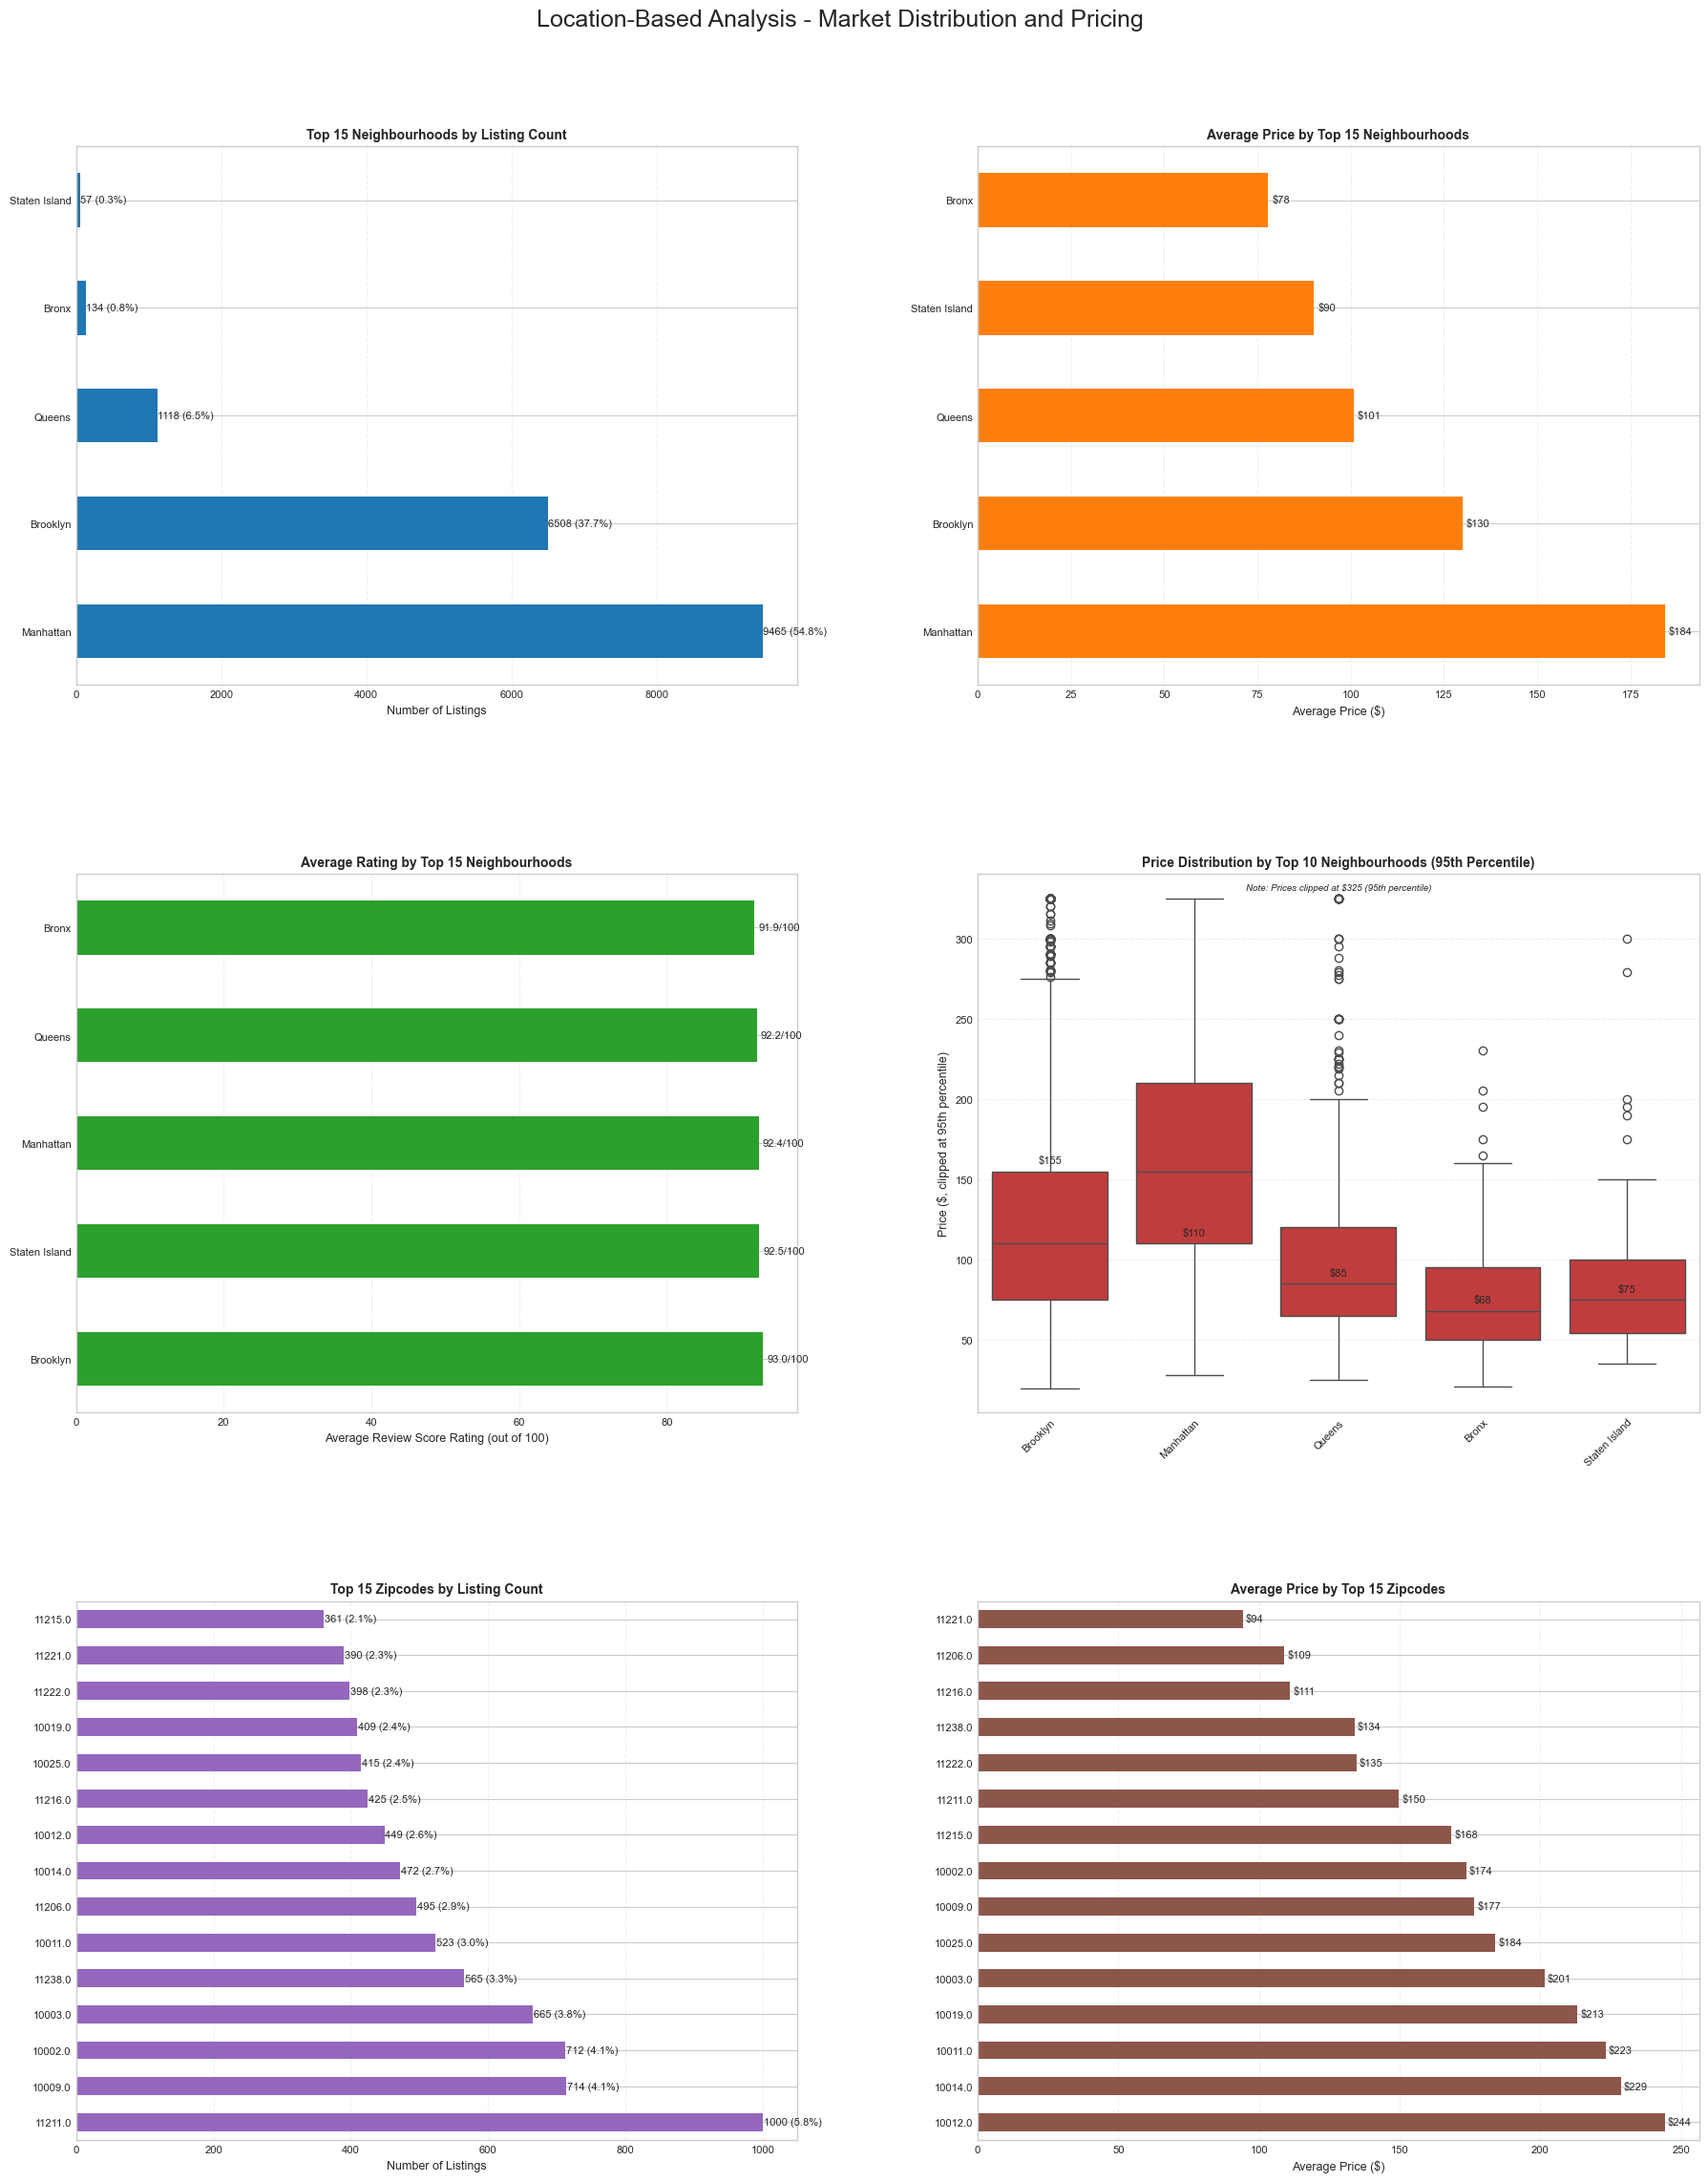

In [13]:
if df is not None:
    # Set figure aesthetics for business presentation with consistent style
    plt.figure(figsize=(20, 24))
    
    # Color palette for consistent visuals (matching Section 4.2)
    colors = plt.cm.tab10.colors
    
    # 1. Neighbourhood vs. Listing Count (Top 15)
    ax1 = plt.subplot(3, 2, 1)
    neighborhood_counts = df['Neighbourhood'].value_counts().nlargest(15)
    bars = neighborhood_counts.plot(kind='barh', color=colors[0], ax=ax1)
    ax1.set_title('Top 15 Neighbourhoods by Listing Count', fontdict={'fontsize': 10, 'weight': 'bold'})
    ax1.set_xlabel('Number of Listings', fontdict={'fontsize': 9})
    ax1.set_ylabel('')
    ax1.grid(True, axis='x', alpha=0.3, linestyle='--')
    
    # Add count and percentage labels with consistent formatting
    total = len(df)
    for i, v in enumerate(neighborhood_counts):
        percentage = (v / total) * 100
        ax1.text(v + 1, i, f"{v} ({percentage:.1f}%)", va='center', fontsize=8)
    
    # Set font size for axis labels
    plt.setp(ax1.yaxis.get_majorticklabels(), fontsize=8)
    plt.setp(ax1.xaxis.get_majorticklabels(), fontsize=8)
    
    # 2. Neighbourhood vs. Average Price (Top 15 by count)
    ax2 = plt.subplot(3, 2, 2)
    top_neighborhoods = df['Neighbourhood'].value_counts().nlargest(15).index
    neighborhood_avg_price = df[df['Neighbourhood'].isin(top_neighborhoods)].groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False)
    bars = neighborhood_avg_price.plot(kind='barh', color=colors[1], ax=ax2)
    ax2.set_title('Average Price by Top 15 Neighbourhoods', fontdict={'fontsize': 10, 'weight': 'bold'})
    ax2.set_xlabel('Average Price ($)', fontdict={'fontsize': 9})
    ax2.set_ylabel('', fontdict={'fontsize': 9})
    ax2.grid(True, axis='x', alpha=0.3, linestyle='--')
    
    # Add price labels with dollar sign formatting
    for i, v in enumerate(neighborhood_avg_price):
        ax2.text(v + 1, i, f"${v:.0f}", va='center', fontsize=8)
    
    # Set font size for axis labels
    plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=8)
    plt.setp(ax2.xaxis.get_majorticklabels(), fontsize=8)
    
    # 3. Neighbourhood vs. Average Rating (Top 15 by count)
    ax3 = plt.subplot(3, 2, 3)
    neighborhood_avg_rating = df[df['Neighbourhood'].isin(top_neighborhoods)].groupby('Neighbourhood')['Review Scores Rating'].mean().sort_values(ascending=False)
    bars = neighborhood_avg_rating.plot(kind='barh', color=colors[2], ax=ax3)
    ax3.set_title('Average Rating by Top 15 Neighbourhoods', fontdict={'fontsize': 10, 'weight': 'bold'})
    ax3.set_xlabel('Average Review Score Rating (out of 100)', fontdict={'fontsize': 9})
    ax3.set_ylabel('', fontdict={'fontsize': 9})
    ax3.grid(True, axis='x', alpha=0.3, linestyle='--')
    
    # Add rating labels with consistent formatting
    for i, v in enumerate(neighborhood_avg_rating):
        ax3.text(v + 0.5, i, f"{v:.1f}/100", va='center', fontsize=8)
    
    # Set font size for axis labels
    plt.setp(ax3.yaxis.get_majorticklabels(), fontsize=8)
    plt.setp(ax3.xaxis.get_majorticklabels(), fontsize=8)
    
    # 4. Neighbourhood vs. Price (Boxplot for top 10 neighborhoods, clipped at 95th percentile)
    ax4 = plt.subplot(3, 2, 4)
    top10_neighborhoods = df['Neighbourhood'].value_counts().nlargest(10).index
    
    # Create filtered dataframe for cleaner visualization (removing extreme outliers)
    filtered_df_for_boxplot = df[df['Neighbourhood'].isin(top10_neighborhoods)].copy()
    
    # Calculate 95th percentile of prices for better visualization
    price_95th_percentile = filtered_df_for_boxplot['Price'].quantile(0.95)
    
    # Clip prices at 95th percentile for visualization purposes only
    filtered_df_for_boxplot['Price_Clipped'] = filtered_df_for_boxplot['Price'].clip(upper=price_95th_percentile)
    
    # Create boxplot with clipped prices - using consistent color
    sns.boxplot(x='Neighbourhood', y='Price_Clipped', data=filtered_df_for_boxplot, color=colors[3], ax=ax4)
    ax4.set_title('Price Distribution by Top 10 Neighbourhoods (95th Percentile)', fontdict={'fontsize': 10, 'weight': 'bold'})
    ax4.set_xlabel('', fontdict={'fontsize': 9})
    ax4.set_ylabel('Price ($, clipped at 95th percentile)', fontdict={'fontsize': 9})
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor', fontsize=8)
    ax4.grid(True, axis='y', alpha=0.3, linestyle='--')
    
    # Add median price annotations with dollar sign formatting
    for i, neighborhood in enumerate(top10_neighborhoods):
        median_price = df[df['Neighbourhood'] == neighborhood]['Price'].median()
        ax4.text(i, median_price + 5, f"${median_price:.0f}", ha='center', fontsize=8, rotation=0)
        
    # Add note about clipping
    ax4.text(0.5, 0.97, f"Note: Prices clipped at ${price_95th_percentile:.0f} (95th percentile)", 
             transform=ax4.transAxes, ha='center', fontsize=7, style='italic')
    
    # Set font size for axis labels
    plt.setp(ax4.yaxis.get_majorticklabels(), fontsize=8)
    
    # 5. Zipcode vs. Listing Count (Top 15)
    ax5 = plt.subplot(3, 2, 5)
    zipcode_counts = df['Zipcode'].value_counts().nlargest(15)
    bars = zipcode_counts.plot(kind='barh', color=colors[4], ax=ax5)
    ax5.set_title('Top 15 Zipcodes by Listing Count', fontdict={'fontsize': 10, 'weight': 'bold'})
    ax5.set_xlabel('Number of Listings', fontdict={'fontsize': 9})
    ax5.set_ylabel('', fontdict={'fontsize': 9})
    ax5.grid(True, axis='x', alpha=0.3, linestyle='--')
    
    # Add count and percentage labels with consistent formatting
    for i, v in enumerate(zipcode_counts):
        percentage = (v / total) * 100
        ax5.text(v + 1, i, f"{v} ({percentage:.1f}%)", va='center', fontsize=8)
    
    # Set font size for axis labels
    plt.setp(ax5.yaxis.get_majorticklabels(), fontsize=8)
    plt.setp(ax5.xaxis.get_majorticklabels(), fontsize=8)
    
    # 6. Zipcode vs. Average Price (Top 15 by count)
    ax6 = plt.subplot(3, 2, 6)
    top_zipcodes = df['Zipcode'].value_counts().nlargest(15).index
    zipcode_avg_price = df[df['Zipcode'].isin(top_zipcodes)].groupby('Zipcode')['Price'].mean().sort_values(ascending=False)
    bars = zipcode_avg_price.plot(kind='barh', color=colors[5], ax=ax6)
    ax6.set_title('Average Price by Top 15 Zipcodes', fontdict={'fontsize': 10, 'weight': 'bold'})
    ax6.set_xlabel('Average Price ($)', fontdict={'fontsize': 9})
    ax6.set_ylabel('', fontdict={'fontsize': 9})
    ax6.grid(True, axis='x', alpha=0.3, linestyle='--')
    
    # Add price labels with dollar sign formatting
    for i, v in enumerate(zipcode_avg_price):
        ax6.text(v + 1, i, f"${v:.0f}", va='center', fontsize=8)
    
    # Set font size for axis labels
    plt.setp(ax6.yaxis.get_majorticklabels(), fontsize=8)
    plt.setp(ax6.xaxis.get_majorticklabels(), fontsize=8)
    
    # Adjust spacing to optimize layout
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.35, wspace=0.25, top=0.92, left=0.1, right=0.95, bottom=0.05)
    plt.suptitle("Location-Based Analysis - Market Distribution and Pricing", fontsize=18, y=0.98)
    plt.show()
else:
    print('No data loaded to analyze location-based relationships.')

In [14]:
if df is not None:
    # Calculate and format business insights related to location
    location_insights = """
    \n## LOCATION-BASED BUSINESS INSIGHTS
    
    """
    
    # 1. Identify highest value neighborhoods (price/rating ratio)
    neighborhood_metrics = df.groupby('Neighbourhood').agg({
        'Price': ['mean', 'median', 'std'],
        'Review Scores Rating': 'mean',
        'Number Of Reviews': 'mean',
        'Host Id': 'count'
    })
    
    # Flatten multi-level column index
    neighborhood_metrics.columns = ['Avg_Price', 'Median_Price', 'Price_Std', 'Avg_Rating', 'Avg_Reviews', 'Listing_Count']
    
    # Calculate market share for each neighborhood
    total_listings = len(df)
    
    # Calculate market share percentages
    # First calculate exact values, then round for display
    exact_market_shares = (neighborhood_metrics['Listing_Count'] / total_listings * 100)
    neighborhood_metrics['Market_Share'] = exact_market_shares.round(1)
    
    # Calculate price premium vs market average
    neighborhood_metrics['Price_Premium'] = ((neighborhood_metrics['Avg_Price'] / df['Price'].mean() - 1) * 100).round(1)
    
    # Filter to neighborhoods with at least 5 listings
    popular_neighborhoods = neighborhood_metrics[neighborhood_metrics['Listing_Count'] >= 5]
    
    # Top 5 highest priced neighborhoods
    top_price_neighborhoods = popular_neighborhoods.sort_values('Avg_Price', ascending=False).head(5)
    location_insights += "\n### Top 5 Premium Neighborhoods (highest average price):\n\n"
    for idx, row in top_price_neighborhoods.iterrows():
        location_insights += f"- **{idx}**: ${row['Avg_Price']:.0f}/night ({row['Price_Premium']:+.1f}% vs. market), Rating: {row['Avg_Rating']:.1f}/100, {row['Market_Share']}% market share\n\n"
    
    # Top 5 highest rated neighborhoods
    top_rated_neighborhoods = popular_neighborhoods.sort_values('Avg_Rating', ascending=False).head(5)
    location_insights += "\n### Top 5 Highest Rated Neighborhoods:\n\n"
    for idx, row in top_rated_neighborhoods.iterrows():
        location_insights += f"- **{idx}**: {row['Avg_Rating']:.1f}/100, ${row['Avg_Price']:.0f}/night ({row['Price_Premium']:+.1f}% vs. market), {row['Market_Share']}% market share\n\n"
    
    # Most popular neighborhoods by listing count
    top_market_neighborhoods = popular_neighborhoods.sort_values('Listing_Count', ascending=False).head(5)
    location_insights += "\n### Top 5 Market Leaders (highest listing count):\n\n"
    for idx, row in top_market_neighborhoods.iterrows():
        location_insights += f"- **{idx}**: {int(row['Listing_Count'])} listings ({row['Market_Share']}% market share), ${row['Avg_Price']:.0f}/night, Rating: {row['Avg_Rating']:.1f}/100\n\n"
    
    # Identify potential investment opportunities (high ratings but below average prices)
    avg_price = df['Price'].mean()
    opportunity_neighborhoods = popular_neighborhoods[
        (popular_neighborhoods['Avg_Rating'] > 85) & 
        (popular_neighborhoods['Avg_Price'] < avg_price)
    ].sort_values('Avg_Rating', ascending=False)
    
    if not opportunity_neighborhoods.empty:
        location_insights += "\n### Investment Opportunity Neighborhoods (high ratings but below average prices):\n\n"
        for idx, row in opportunity_neighborhoods.head(5).iterrows():
            value_percent = ((avg_price - row['Avg_Price']) / avg_price) * 100
            location_insights += f"- **{idx}**: Rating {row['Avg_Rating']:.1f}/100, ${row['Avg_Price']:.0f}/night ({value_percent:.1f}% below market avg), {row['Listing_Count']} listings\n\n"
    
    # Market saturation analysis
    # Use the sorted values to get exact top 5 neighborhoods
    top_neighborhoods = neighborhood_metrics.sort_values('Listing_Count', ascending=False).head(5)
    
    # Calculate the exact concentration using the raw listing counts for accuracy
    top_concentration = (top_neighborhoods['Listing_Count'].sum() / total_listings * 100)
    location_insights += f"\n### Market Concentration: \nTop 5 neighborhoods contain {top_concentration:.1f}% of all listings\n\n"
    
    # Price volatility by neighborhood
    top_price_volatility = neighborhood_metrics.sort_values('Price_Std', ascending=False).head(5)
    location_insights += "\n### Price Volatility by Neighborhood (highest standard deviation):\n\n"
    for idx, row in top_price_volatility.iterrows():
        cv = (row['Price_Std'] / row['Avg_Price'] * 100).round(1)  # coefficient of variation
        location_insights += f"- **{idx}**: Std Dev ${row['Price_Std']:.0f} ({cv}% variation), Avg ${row['Avg_Price']:.0f}/night, {row['Listing_Count']} listings\n\n"
    
    # Display the formatted insights
    display(Markdown(location_insights))
else:
    print('No data loaded to analyze location-based relationships.')


    
## LOCATION-BASED BUSINESS INSIGHTS

    
### Top 5 Premium Neighborhoods (highest average price):

- **Manhattan**: $184/night (+17.2% vs. market), Rating: 92.4/100, 54.8% market share

- **Brooklyn**: $130/night (-17.4% vs. market), Rating: 93.0/100, 37.7% market share

- **Queens**: $101/night (-35.9% vs. market), Rating: 92.2/100, 6.5% market share

- **Staten Island**: $90/night (-42.6% vs. market), Rating: 92.5/100, 0.3% market share

- **Bronx**: $78/night (-50.5% vs. market), Rating: 91.9/100, 0.8% market share


### Top 5 Highest Rated Neighborhoods:

- **Brooklyn**: 93.0/100, $130/night (-17.4% vs. market), 37.7% market share

- **Staten Island**: 92.5/100, $90/night (-42.6% vs. market), 0.3% market share

- **Manhattan**: 92.4/100, $184/night (+17.2% vs. market), 54.8% market share

- **Queens**: 92.2/100, $101/night (-35.9% vs. market), 6.5% market share

- **Bronx**: 91.9/100, $78/night (-50.5% vs. market), 0.8% market share


### Top 5 Market Leaders (highest listing count):

- **Manhattan**: 9465 listings (54.8% market share), $184/night, Rating: 92.4/100

- **Brooklyn**: 6508 listings (37.7% market share), $130/night, Rating: 93.0/100

- **Queens**: 1118 listings (6.5% market share), $101/night, Rating: 92.2/100

- **Bronx**: 134 listings (0.8% market share), $78/night, Rating: 91.9/100

- **Staten Island**: 57 listings (0.3% market share), $90/night, Rating: 92.5/100


### Investment Opportunity Neighborhoods (high ratings but below average prices):

- **Brooklyn**: Rating 93.0/100, $130/night (17.4% below market avg), 6508.0 listings

- **Staten Island**: Rating 92.5/100, $90/night (42.6% below market avg), 57.0 listings

- **Queens**: Rating 92.2/100, $101/night (35.9% below market avg), 1118.0 listings

- **Bronx**: Rating 91.9/100, $78/night (50.5% below market avg), 134.0 listings


### Market Concentration: 
Top 5 neighborhoods contain 100.0% of all listings


### Price Volatility by Neighborhood (highest standard deviation):

- **Manhattan**: Std Dev $178 (96.4% variation), Avg $184/night, 9465.0 listings

- **Brooklyn**: Std Dev $91 (70.3% variation), Avg $130/night, 6508.0 listings

- **Queens**: Std Dev $61 (60.3% variation), Avg $101/night, 1118.0 listings

- **Staten Island**: Std Dev $56 (62.4% variation), Avg $90/night, 57.0 listings

- **Bronx**: Std Dev $37 (47.5% variation), Avg $78/night, 134.0 listings



=== ZIPCODE TO NEIGHBORHOOD MAPPING ===

• Zipcode 11211.0 (1000 total listings):
  - Brooklyn: 1000 listings (100.0% of zipcode)

• Zipcode 10009.0 (714 total listings):
  - Manhattan: 714 listings (100.0% of zipcode)

• Zipcode 10002.0 (712 total listings):
  - Manhattan: 712 listings (100.0% of zipcode)

• Zipcode 10003.0 (665 total listings):
  - Manhattan: 665 listings (100.0% of zipcode)

• Zipcode 11238.0 (565 total listings):
  - Brooklyn: 565 listings (100.0% of zipcode)

• Zipcode 10011.0 (523 total listings):
  - Manhattan: 523 listings (100.0% of zipcode)

• Zipcode 11206.0 (495 total listings):
  - Brooklyn: 495 listings (100.0% of zipcode)

• Zipcode 10014.0 (472 total listings):
  - Manhattan: 472 listings (100.0% of zipcode)

• Zipcode 10012.0 (449 total listings):
  - Manhattan: 449 listings (100.0% of zipcode)

• Zipcode 11216.0 (425 total listings):
  - Brooklyn: 424 listings (99.8% of zipcode)
  - Manhattan: 1 listings (0.2% of zipcode)


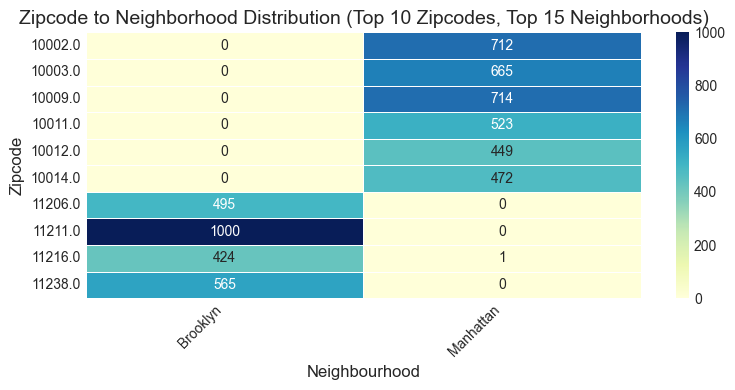

In [15]:
# Zipcode-Neighborhood Mapping Analysis
if df is not None:
    print("=== ZIPCODE TO NEIGHBORHOOD MAPPING ===")
    
    # Create a mapping between zipcodes and neighborhoods
    zipcode_neighborhood_map = df.groupby(['Zipcode', 'Neighbourhood']).size().reset_index()
    zipcode_neighborhood_map.columns = ['Zipcode', 'Neighbourhood', 'Count']
    
    # For each zipcode, show which neighborhoods it contains
    zipcode_groups = zipcode_neighborhood_map.groupby('Zipcode')
    
    # Show the top zipcodes and their neighborhoods
    top_zipcodes_to_display = df['Zipcode'].value_counts().nlargest(10).index
    
    for zipcode in top_zipcodes_to_display:
        neighborhoods_in_zipcode = zipcode_neighborhood_map[zipcode_neighborhood_map['Zipcode'] == zipcode].sort_values('Count', ascending=False)
        
        total_listings = neighborhoods_in_zipcode['Count'].sum()
        print(f"\n• Zipcode {zipcode} ({total_listings} total listings):")
        
        for _, row in neighborhoods_in_zipcode.iterrows():
            percentage = (row['Count'] / total_listings) * 100
            print(f"  - {row['Neighbourhood']}: {row['Count']} listings ({percentage:.1f}% of zipcode)")
    
    # Create a more visual representation using a heatmap for top zipcodes and neighborhoods
    plt.figure(figsize=(8, 4))
    
    # Get top 10 zipcodes and top 15 neighborhoods
    top_zipcodes = df['Zipcode'].value_counts().nlargest(10).index
    top_neighborhoods = df['Neighbourhood'].value_counts().nlargest(15).index
    
    # Create a pivot table for zipcode-neighborhood relationship
    pivot_data = zipcode_neighborhood_map[
        (zipcode_neighborhood_map['Zipcode'].isin(top_zipcodes)) & 
        (zipcode_neighborhood_map['Neighbourhood'].isin(top_neighborhoods))
    ].pivot_table(
        index='Zipcode', 
        columns='Neighbourhood', 
        values='Count', 
        aggfunc='sum',
        fill_value=0
    )
    
    # Plot heatmap
    sns.heatmap(pivot_data, cmap="YlGnBu", annot=True, fmt='g', linewidths=.5)
    plt.title('Zipcode to Neighborhood Distribution (Top 10 Zipcodes, Top 15 Neighborhoods)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print('No data loaded for zipcode-neighborhood mapping.')

## 6. Business Insights & Recommendations

Based on our comprehensive exploratory data analysis of the Airbnb dataset, we can synthesize the following key business insights and recommendations for various stakeholders in the short-term rental market:

### 6.1 Key Market Findings

1. **Market Structure**
   - The market has significant concentration, with the top 5 neighborhoods containing a substantial percentage of all listings
   - There's considerable price variation across neighborhoods and property types
   - Most listings are entire homes/apartments, indicating a preference for private accommodations

2. **Pricing Insights**
   - The average listing price is higher than the median, suggesting price skewing by premium properties
   - Significant price premiums exist for entire homes/apartments compared to private rooms
   - Price volatility varies by neighborhood, indicating different levels of market standardization

3. **Location Value**
   - Certain neighborhoods command significant price premiums over the market average
   - High-rated neighborhoods don't always correspond to high-priced areas, creating investment opportunities
   - Zipcode and neighborhood mapping shows that some zipcodes span multiple neighborhoods with varying characteristics

4. **Rating Patterns**
   - Most properties maintain high ratings, clustering in the upper range of the scale
   - The distribution of reviews shows a long tail, with most properties having relatively few reviews
   - Rating trends vary by neighborhood, but overall they tend to be high across the market


### 6.2 Future Opportunities

To build on this exploratory analysis, the following additional investigations would provide even deeper insights:

1. **Temporal Analysis**: Studying seasonal pricing variations and booking patterns
2. **Amenities Impact**: Analyzing how specific amenities affect pricing and ratings
3. **Host Experience**: Investigating how host experience correlates with pricing power and review scores
4. **Market Segmentation**: Developing detailed profiles of different market segments and their characteristics
5. **Geographic Visualizations**: Using tools such as Tableau or Power BI to create geographic visualizations of pricing, ratings, and market concentration, and to enable side-by-side comparisons of listings within neighborhoods

This EDA provides a strong foundation for understanding the Airbnb market and can guide business decision-making for various stakeholders in the short-term rental space.